# Basic Analyses:
  
contains:
- no-brainer analysis
- model parameter plots for Emma's model 


In [2]:
import subprocess
label = subprocess.check_output(["git", "rev-parse","--verify","HEAD"]).strip()
print('GIT SHA: '+str(label))

GIT SHA: b'e4c1e6e03f13d71eafc9b25443636876b885d26d'


In [172]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
import scipy.stats as ss
sns.set_context('notebook')
sns.set_style('white')

In [173]:
import sys
sys.path.append("../functions/")
#for data preprocessing
import Scripts_Data_Processing
import imp

imp.reload(Scripts_Data_Processing)
from Scripts_Data_Processing import *
#for model fit
import Scripts_LogRegModels_v2
imp.reload(Scripts_LogRegModels_v2)
from Scripts_LogRegModels_v2 import *

import NoBrainer_Analysis_AllinOne
imp.reload( NoBrainer_Analysis_AllinOne)
from  NoBrainer_Analysis_AllinOne import *

import Triplets_Correlations_Scatterplots
imp.reload( Triplets_Correlations_Scatterplots)
from  Triplets_Correlations_Scatterplots import *

import Plot_models
imp.reload(Plot_models)
from Plot_models import *

In [267]:
df_list = []
vp_perform_gainloss_list = []
vp_nb_gainloss_list = []
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30', '31',
           '32', '33', '34', '35', '36', '37', '38', '39', '40']
for vp in vp_list:
    path = os.path.join(os.getcwd(),'..','data','data_gainloss_logfiles','vp' + vp + '_gainloss_processed.csv')
    df = pd.read_csv(path, sep=",")
    #preprocess gainloss data
    df=preprocess_gainloss(df)
    #preprocess data
    df = preprocess(df)
    #store prepocessed data in list that contains data for all subjects (for later analysis)
    df_list.append(df)
    #create subset with unambiguous trials for no brainer analysis
    nb_df = drop_ambi_trials(df)
    #create variables indicating whether left or right was the better option
    better_choice_gainloss(nb_df)
    #indicate whether the better box was chosen
    nb_df = right_choice(nb_df)
    #only keep trials that are 'no brainers'
    nb_df = keep_nobrainers(nb_df)
    #calculate performance
    vp_perform_gainloss = ['vp' + vp, vp_perf(nb_df)]
    #store each vp performance in list
    vp_perform_gainloss_list.append(vp_perform_gainloss)
    #vp performance sectionwise
    vp_nb_gainloss = nb_df.groupby('section').mean().add_prefix('gainloss_')[['gainloss_choseBetter']]
    vp_nb_gainloss['MID'] = 'vp'+ vp
    vp_nb_gainloss_list.append(vp_nb_gainloss)
    
#make dataframe for nb performance
nobrainer_gainloss = pd.DataFrame(vp_perform_gainloss_list,columns=['MID','nbperf'])

#dataframe for single subject (last one) to try out code
gainloss_ls_df = df


## No-Brainer Scores

In [8]:
#Merge dataframe list to single dataframe. "inner": Just take columns which exist in all dataframes    
gainloss_df = pd.concat(df_list, ignore_index = True, join = 'inner')  

### Gain/Loss Task

In [9]:
nobrainer_gainloss

,MID,nbperf
0,vp06,0.941176
1,vp07,0.970588
2,vp10,1.000000
3,vp11,0.970588
4,vp12,0.941176
5,vp13,0.911765
6,vp15,0.941176
7,vp16,0.970588
8,vp17,0.970588
9,vp18,0.941176


### Shock Task

In [268]:
df_list = []
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']
vp_perform_shock_list = []
vp_nb_shock_list = []
section_list = ['1', '2', '3']
for vp in vp_list:
    df = []
    for sec in section_list:
        path = os.path.join(os.getcwd(),'..','data','data_shock_logfiles','Expt1Pain_Behaviour_vp' + vp + '_' + sec + '.txt')
        df_dummy = pd.read_csv(path, sep="\t", skiprows = [0])
        df_dummy = df_dummy[:-1] #deletes last row of each section as it does not contain trial data
        df_dummy['MID'] = 'vp'+ vp
        df_dummy['section'] = sec
        df_dummy.columns = df_dummy.columns.str.replace(' ','')
        df.append(df_dummy)
    
    #create a df that contains data from all sections    
    df = pd.concat(df, ignore_index = True, join = 'inner')
    #preprocess shock data
    df = preprocess_shock(df)
    #preprocess data
    df = preprocess(df)
    #store prepocessed data in list that contains data for all subjects (for later analysis)
    df_list.append(df)
    #create subset with unambiguous trials for no brainer analysis
    nb_df = drop_ambi_trials(df)
    #create variables indicating whether left or right was the better option
    better_choice_shock(nb_df)
    #indicate whether the better box was chosen
    nb_df = right_choice(nb_df)
    #only keep trials that are 'no brainers'
    nb_df = keep_nobrainers(nb_df)
    #calculate performance
    vp_perform_shock = ['vp' + vp, vp_perf(nb_df)]
    #store each vp performance in list
    vp_perform_shock_list.append(vp_perform_shock)
    #vp performance sectionwise
    vp_nb_shock = nb_df.groupby('section').mean().add_prefix('shock_')[['shock_choseBetter']]
    vp_nb_shock['MID'] = 'vp'+ vp
    vp_nb_shock_list.append(vp_nb_shock)
    
#make dataframe for nb performance
nobrainer_shock = pd.DataFrame(vp_perform_shock_list,columns=['MID','nbperf'])

#dataframe for single subject (last one) to try out code
shock_ls_df = df

In [11]:
#create complete df for shock condition with all vps        
shock_df = pd.concat(df_list, ignore_index = True, join = 'inner')

In [12]:
nobrainer_shock

,MID,nbperf
0,vp06,0.882353
1,vp07,1.000000
2,vp10,1.000000
3,vp11,1.000000
4,vp12,0.941176
5,vp13,1.000000
6,vp15,0.941176
7,vp16,1.000000
8,vp17,1.000000
9,vp18,1.000000


In [13]:
param_sets_split = {}
param_sets_split['0'] = ['mag_diff','prob_diff']
param_sets_split['1'] = ['mag_diff','prob_diff','ambiguityLevel']

In [98]:
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30','31', '32', '33', '34', '35', '36', '37', '38', '39', '40']
resultnames = ['bic','aic','pseudoR2','pred_acc','llr_pvalue']
model_param_df = np.array(['','','',3.0,3.0])
model_summary_df = nobrainer_gainloss

for vp in vp_list:
    
    df = gainloss_df[gainloss_df.MID == 'vp' + vp]
    MID = 'vp' + vp
        
    for split in ['ambig_gain','ambig_loss','unambig_gain','unambig_loss']:
        if 'unambig' in split:
            paramnum='0'
        else:
            paramnum='1'
            
        # Fit a model to each set of trials 
        out = fit_model_split_amb_unamb_gain_loss(df, whichreturn= split, params=param_sets_split[paramnum],zscore=True)
        
        modelname = out['modelname']

        for result in resultnames:
            model_summary_df.loc[(model_summary_df.MID== 'vp' + vp),result+'_'+split]=out[result]

        params = out['params']
        se=out['se']
        for param in params.index:
            paramn = param.replace('_loss','')
            paramn = paramn.replace('_gain','')
            paramn = paramn.replace('_amb','')
            paramn = paramn.replace('_rl','')
            row = np.array([MID,paramn,split,params[param],se[param]])
            model_param_df=np.vstack((model_param_df,row))

model_param_df = pd.DataFrame(model_param_df,columns=['MID','parameter','split','beta','se'])
model_param_df.drop(0,inplace=True) #df.index[0]
model_param_df['beta']=model_param_df['beta'].astype('float')
model_param_df_gainloss = model_param_df
model_summary_gainloss_df = model_summary_df



In [99]:
#print(out['aic'])
#print(out['pred_acc'])
#print(out['modelname'])
#out['results'].summary()

In [100]:
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']
resultnames = ['bic','aic','pseudoR2','pred_acc', 'llr_pvalue'] 
model_param_df = np.array(['','','',3.0, 3.0])
model_summary_df = nobrainer_shock

for vp in vp_list:
    
    df = shock_df[shock_df.MID == 'vp' + vp]
    MID = 'vp' + vp
        
    for split in ['ambig_shock','unambig_shock']:
        #print(split)
        if 'unambig' in split:
            paramnum='0'
        else:
            paramnum='1'
        # Fit a model to the ambiguous gain trials 
        out = fit_model_split_amb_unamb_gain_loss(df, whichreturn= split, params=param_sets_split[paramnum],zscore=True)
        
    
        modelname = out['modelname']

        for result in resultnames:
            model_summary_df.loc[(model_summary_df.MID== 'vp' + vp),result+'_'+split]=out[result]

        params = out['params']
        se = out['se']
        for param in params.index:
            paramn = param.replace('_gain','')
            paramn = paramn.replace('_amb','')
            paramn = paramn.replace('_rl','')
            row = np.array([MID,paramn,split,params[param],se[param]])
            model_param_df=np.vstack((model_param_df,row))

model_param_df = pd.DataFrame(model_param_df,columns=['MID','parameter','split','beta', 'se'])
model_param_df.drop(0,inplace=True) #df.index[0]
model_param_df['beta']=model_param_df['beta'].astype('float')
model_param_df_shock = model_param_df        
model_summary_shock_df = model_summary_df
   

## No-Brainer vs Model fit

### gainloss

/Users/chris/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


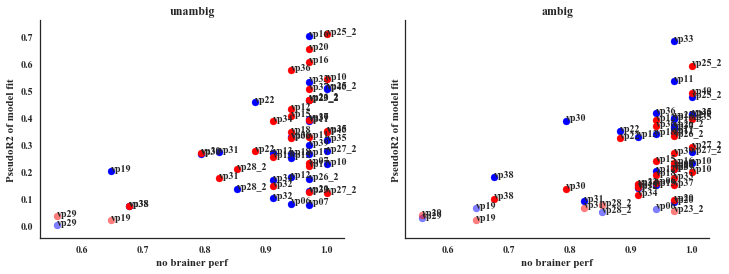

In [136]:
plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc("font", family="Times New Roman")
sns.set_context('notebook')
fig,axes =plt.subplots(1,2, figsize=(12,4),sharey=True,sharex=True)

MIDS = model_summary_gainloss_df.MID
NB = model_summary_gainloss_df['nbperf']
for tt,trial_type in enumerate(['unambig','ambig']):
    for task in ['gain','loss']:
        R2 = model_summary_gainloss_df['pseudoR2_'+trial_type+'_'+task]
        pvals = model_summary_gainloss_df['llr_pvalue_'+trial_type+'_'+task]
        color ='b' if task=='gain' else 'r'
        plt.legend()

        for r,n,p,mid in zip(R2,NB,pvals,MIDS):
            alpha=1.0 if p<0.05 else 0.5
            axes[tt].scatter(n,r, c=color,alpha=alpha)
            axes[tt].annotate(mid,(n,r),fontsize=10)
            #plt.legend()
    axes[tt].set_xlabel('no brainer perf')
    axes[tt].set_ylabel('PseudoR2 of model fit')
    axes[tt].set_title(trial_type)

sns.despine()
#plt.legend()



### shock

/Users/chris/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


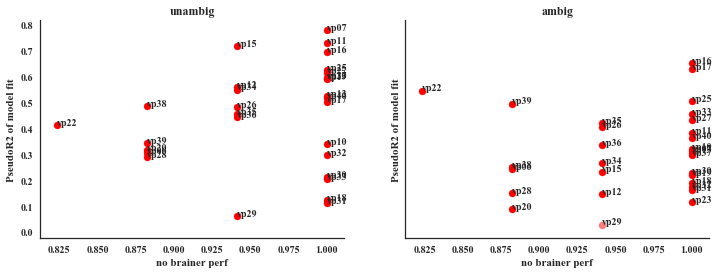

In [266]:
plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc("font", family="Times New Roman")
sns.set_context('notebook')
fig,axes =plt.subplots(1,2, figsize=(12,4),sharey=True,sharex=True)

MIDS = model_summary_shock_df.MID
NB = model_summary_shock_df['nbperf']
for tt,trial_type in enumerate(['unambig','ambig']):
    for task in ['shock']:
        R2 = model_summary_shock_df['pseudoR2_'+trial_type+'_'+task]
        pvals = model_summary_shock_df['llr_pvalue_'+trial_type+'_'+task]
        color ='b' if task=='gain' else 'r'

        for r,n,p,mid in zip(R2,NB,pvals,MIDS):
            alpha=1.0 if p<0.05 else 0.5
            axes[tt].scatter(n,r, c=color,alpha=alpha)
            axes[tt].annotate(mid,(n,r),fontsize=10)
    axes[tt].set_xlabel('no brainer perf')
    axes[tt].set_ylabel('PseudoR2 of model fit')
    axes[tt].set_title(trial_type)
sns.despine()
plt.legend()

In [109]:
### bargraph for parameters

In [192]:
# dataframe for gainloss and shock to plot in one graph
model_param_df = pd.concat([model_param_df_gainloss, model_param_df_shock])

In [193]:
# reverse beta parameters for shock and loss to match gain
model_param_df.loc[(model_param_df.split == 'ambig_shock') & (model_param_df.parameter == 'mag_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'ambig_shock')& (model_param_df.parameter == 'mag_diff'),'beta']*-1
model_param_df.loc[(model_param_df.split == 'unambig_shock') & (model_param_df.parameter == 'mag_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'unambig_shock') & (model_param_df.parameter == 'mag_diff'),'beta']*-1

model_param_df.loc[(model_param_df.split == 'ambig_shock') & (model_param_df.parameter == 'prob_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'ambig_shock') & (model_param_df.parameter == 'prob_diff'),'beta']*-1
model_param_df.loc[(model_param_df.split == 'unambig_shock') & (model_param_df.parameter == 'prob_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'unambig_shock') & (model_param_df.parameter == 'prob_diff'),'beta']*-1
model_param_df.loc[(model_param_df.split == 'ambig_loss') & (model_param_df.parameter == 'prob_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'ambig_loss') & (model_param_df.parameter == 'prob_diff'),'beta']*-1
model_param_df.loc[(model_param_df.split == 'unambig_loss') & (model_param_df.parameter == 'prob_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'unambig_loss') & (model_param_df.parameter == 'prob_diff'),'beta']*-1


In [194]:
#plot bargraph
#fig = plot_params(model_param_df, stripplot=False)

In [195]:
#print(len(model_param_df_shock))
model_param_df_shock = model_param_df_shock.loc[model_param_df_shock['MID']!='vp29',]
model_param_df_shock = model_param_df_shock.loc[model_param_df_shock['MID']!='vp19',]
#print(len(model_param_df_shock))

In [196]:
#print(len(model_param_df_gainloss))
model_param_df_gainloss = model_param_df_gainloss.loc[model_param_df_gainloss['MID']!='vp29',]
model_param_df_gainloss = model_param_df_gainloss.loc[model_param_df_gainloss['MID']!='vp19',]
#print(len(model_param_df_gainloss))

In [197]:
#print(len(model_param_df))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]
#print(len(model_param_df))

In [198]:
#bargraph without excluded subjects
#fig = plot_params(model_param_df, stripplot=False)

In [122]:
# Plot individual parameter per task

In [123]:
#change MIDs to match between gainloss and shock versions
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))

In [124]:
#sns.set(style="ticks")
#model_param_df_merged = sns.load_dataset("model_param_df_merged")
#g = sns.factorplot(x="split", y="beta", col="parameter", row="MID", data=model_param_df)

In [125]:
triplet_intercept = triplet(model_param_df, 'intercept', ambiguous=True)
triplet_magdiff = triplet(model_param_df, 'mag_diff', ambiguous=True)
triplet_probdiff = triplet(model_param_df, 'prob_diff', ambiguous=True)
triplet_ambiguityLevel = triplet(model_param_df, 'ambiguityLevel', ambiguous=True)

In [127]:
triplet_intercept_unambi = triplet(model_param_df, 'intercept', ambiguous=False)
triplet_magdiff_unambi = triplet(model_param_df, 'mag_diff', ambiguous=False)
triplet_probdiff_unambi = triplet(model_param_df, 'prob_diff', ambiguous=False)
triplet_ambiguityLevel_unambi = triplet(model_param_df, 'ambiguityLevel', ambiguous=False)

In [128]:
def count_order(triplet_df):

    triplet_df['order'] = np.nan

    triplet_df.loc[(triplet_df['gain'] > triplet_df['loss']) & (triplet_df['loss'] > triplet_df['shock']) & (triplet_df['gain'] > triplet_df['shock']), 'order'] = 'gls'

    triplet_df.loc[(triplet_df['gain'] > triplet_df['loss']) & (triplet_df['loss'] < triplet_df['shock']) & (triplet_df['gain'] > triplet_df['shock']), 'order'] = 'gsl'

    triplet_df.loc[(triplet_df['loss'] > triplet_df['gain']) & (triplet_df['gain'] > triplet_df['shock']) & (triplet_df['loss'] > triplet_df['shock']), 'order'] = 'lgs'

    triplet_df.loc[(triplet_df['loss'] > triplet_df['gain']) & (triplet_df['gain'] < triplet_df['shock']) & (triplet_df['loss'] > triplet_df['shock']), 'order'] = 'lsg'

    triplet_df.loc[(triplet_df['shock'] > triplet_df['gain']) & (triplet_df['gain'] > triplet_df['loss']) & (triplet_df['loss'] < triplet_df['shock']), 'order'] = 'sgl'

    triplet_df.loc[(triplet_df['shock'] > triplet_df['gain']) & (triplet_df['gain'] < triplet_df['loss']) & (triplet_df['loss'] < triplet_df['shock']), 'order'] = 'slg'

    orderCount = pd.value_counts(triplet_df['order'])
    
    return(orderCount)

In [247]:
#count_order(triplet_intercept)

In [87]:
#count_order(triplet_probdiff)

In [66]:
#count_order(triplet_magdiff)

In [67]:
#count_order(triplet_ambiguityLevel)

In [68]:
#triplet_probdiff.head()

In [69]:
tableOrder = triplet_intercept.drop(triplet_intercept.columns[[1, 2, 3, 4, 5, 6]], axis=1)  # df.columns is zero-based pd.Index 
#tableOrder

In [71]:
# #table to plot counts
# tableOrder = tableOrder.rename(columns={'order': 'intercept'})
# tableOrder['prob_diff'] = triplet_probdiff['order']
# tableOrder['mag_diff'] = triplet_magdiff['order']
# tableOrder['ambiguityLevel'] = triplet_ambiguityLevel['order']
# #table order should be long format
# tableOrder = pd.melt(tableOrder, id_vars = 'MID', value_vars = ['intercept', 'prob_diff', 'mag_diff', 'ambiguityLevel'], var_name='parameter', value_name = 'order')

## Within-Subject Ranking 

gls = gain > shock > loss etc.

Capture within subject ranking preferences for ambiguity. 

In [35]:
frame = tableOrder.groupby(['parameter', 'order'], as_index = False).count()
frame = frame.pivot(index='parameter', columns='order', values='MID')
frame = frame.fillna(0)
#frame = frame.as_matrix()
frame

order,gls,gsl,lgs,lsg,sgl,slg
parameter,,,,,,
ambiguityLevel,9.0,5.0,4.0,6.0,1.0,2.0
intercept,2.0,0.0,9.0,11.0,0.0,5.0
mag_diff,9.0,5.0,2.0,5.0,4.0,2.0
prob_diff,5.0,6.0,3.0,1.0,10.0,2.0


Highly significant chi-squared test for intercept. 

In [36]:
ss.chisquare(frame, f_exp=None, ddof=0, axis=1)

Power_divergenceResult(statistic=array([  9.22222222,  24.33333333,   7.44444444,  11.88888889]), pvalue=array([  1.00522051e-01,   1.87317623e-04,   1.89628338e-01,
         3.63423890e-02]))

In [130]:
#adjust errorbars
def adjErrTriplet(triplet_df):
    smean = triplet_df.mean(axis=1).values
    grandMean = sum(smean)/len(smean)
    triplet_df['shock'] = triplet_df['shock']-smean+grandMean
    triplet_df['gain'] = triplet_df['gain']-smean+grandMean
    triplet_df['loss'] = triplet_df['loss']-smean+grandMean
    return (triplet_df)

In [131]:
# adjErrTriplet(triplet_intercept)
# plotTripletAllSubs(triplet_intercept, 'intercept', 'Ambiguous Trials')
# adjErrTriplet(triplet_magdiff)
# plotTripletAllSubs(triplet_magdiff,'Diff.Magnitude','Ambiguous Trials')
# adjErrTriplet(triplet_probdiff)
# plotTripletAllSubs(triplet_probdiff,'Diff.Probability','Ambiguous Trials')
# adjErrTriplet(triplet_ambiguityLevel)
# plotTripletAllSubs(triplet_ambiguityLevel,'Ambiguity Level','Ambiguous Trials')

In [132]:
# adjErrTriplet(triplet_intercept_unambi)
# plotTripletAllSubs(triplet_intercept_unambi, 'intercept', 'Unambiguous Trials')
# adjErrTriplet(triplet_magdiff_unambi)
# plotTripletAllSubs(triplet_magdiff_unambi,'Diff.Magnitude','Unambiguous Trials')
# adjErrTriplet(triplet_probdiff_unambi)
# plotTripletAllSubs(triplet_probdiff_unambi,'Diff.Probability','Unambiguous Trials')
# #adjErrTriplet(triplet_ambiguityLevel_unambi)
# #plotTripletAllSubs(triplet_ambiguityLevel_unambi,'Ambiguity Level','Ambiguous Trials')

## Parameter Correlations Across Task 

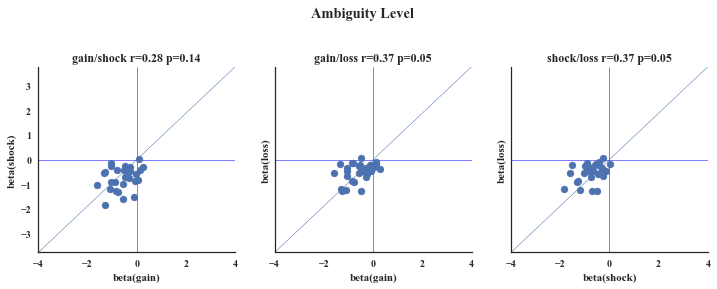

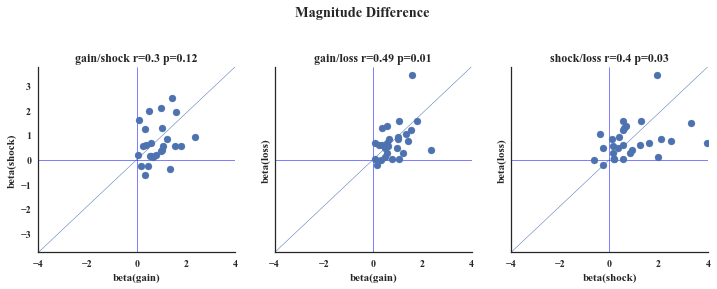

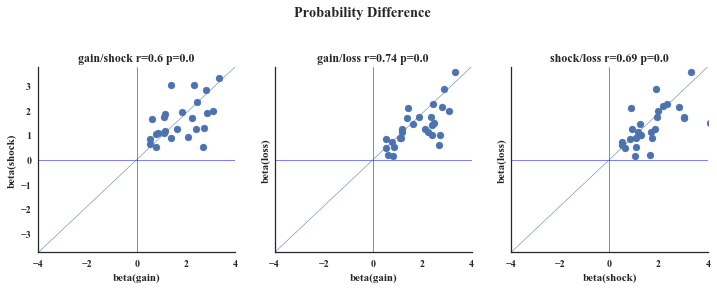

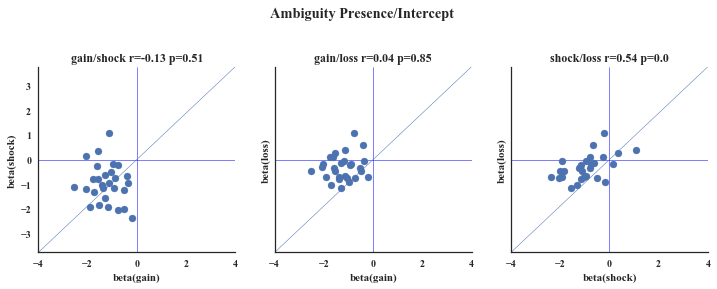

In [138]:
plotTriplet(triplet_ambiguityLevel, 'Ambiguity Level')
plotTriplet(triplet_magdiff, 'Magnitude Difference')
plotTriplet(triplet_probdiff, 'Probability Difference')
f=plotTriplet(triplet_intercept, 'Ambiguity Presence/Intercept')

## Parameter Correlation Within Task 

In [174]:
gain = triplet_magdiff.drop(triplet_magdiff.iloc[:, 2:8], axis = 1)
gain = gain.rename(columns={'gain': 'magdiff'})
gain['probdiff'] = triplet_probdiff['gain']

In [175]:
loss = triplet_magdiff.drop(triplet_magdiff.iloc[:,[1,2,4,5,6]], axis = 1)
loss = loss.rename(columns={'loss': 'magdiff'})
loss['probdiff'] = triplet_probdiff['loss']

In [176]:
shock = triplet_magdiff.drop(triplet_magdiff.iloc[:, [1,2,3,4,6]], axis = 1)
shock = shock.rename(columns={'shock': 'magdiff'})
shock['probdiff'] = triplet_probdiff['shock']

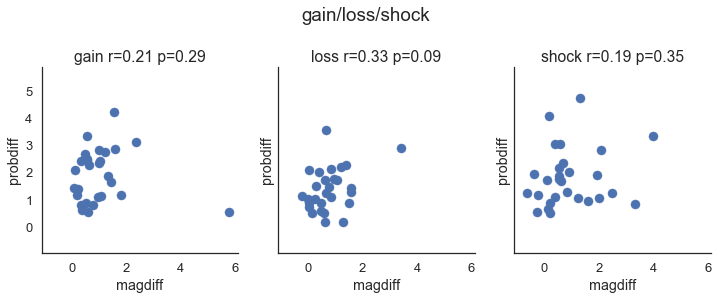

In [178]:
fig = plotTriplet_task(gain, loss, shock)

In [179]:
gain = triplet_ambiguityLevel.drop(triplet_ambiguityLevel.iloc[:, 2:8], axis = 1)
gain = gain.rename(columns={'gain': 'ambiguityLevel'})
gain['ambiguityIntercept'] = triplet_intercept['gain']

In [180]:
loss = triplet_ambiguityLevel.drop(triplet_ambiguityLevel.iloc[:,[1,2,4,5,6]], axis = 1)
loss = loss.rename(columns={'loss': 'ambiguityLevel'})
loss['ambiguityIntercept'] = triplet_intercept['loss']

In [181]:
shock = triplet_ambiguityLevel.drop(triplet_ambiguityLevel.iloc[:, [1,2,3,4,6]], axis = 1)
shock = shock.rename(columns={'shock': 'ambiguityLevel'})
shock['ambiguityIntercept'] = triplet_intercept['shock']

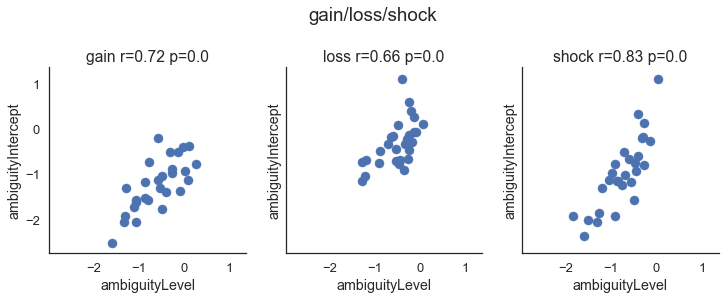

In [183]:
fig = plotTriplet_task(gain, loss, shock,param1='ambiguityLevel',param2='ambiguityIntercept')

In [199]:
#model_param_df

In [200]:
model_param_df['condition'] = model_param_df['split']
model_param_df = model_param_df.rename(columns={"split": "task"})
model_param_df.task = model_param_df.task.str.replace('ambig_', '')
model_param_df.task = model_param_df.task.str.replace('un', '')
model_param_df.condition = model_param_df.condition.str.replace('_gain', 'uous')
model_param_df.condition = model_param_df.condition.str.replace('_loss', 'uous')
model_param_df.condition = model_param_df.condition.str.replace('_shock', 'uous')
model_param_df.head()

,MID,parameter,task,beta,se,condition
1,vp06,intercept,gain,-1.759563,0.343866292919,ambiguous
2,vp06,mag_diff,gain,0.362886,0.373872390106,ambiguous
3,vp06,prob_diff,gain,0.618895,0.39654069989,ambiguous
4,vp06,ambiguityLevel,gain,-0.476255,0.306502282594,ambiguous
5,vp06,intercept,loss,0.111916,0.25354260985,ambiguous


## Parameter Bar Plots

### Ambiguity level 

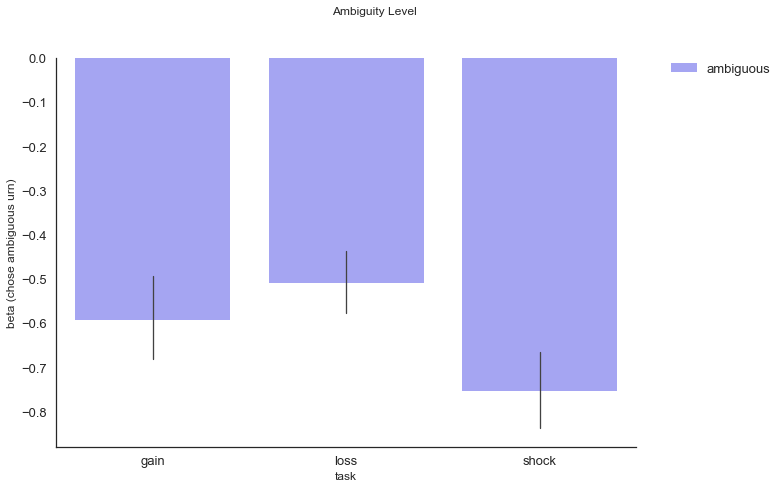

In [209]:
model_df = model_param_df.loc[model_param_df['parameter'] == 'ambiguityLevel']
fig = plot_bargraph_single_param(model_df,stripplot=False,outlier_cutoff=None, suptitle='Ambiguity Level', ylabel='beta (chose ambiguous urn)', xlabel='task', order=['ambiguous'], colors = ['blue'], widtherr = 1.3)


In [ ]:
#### Gain as reference

In [216]:
# #df.gain_or_loss_trial.astype('category')
# y,X = dmatrices('beta ~ task', data = model_df, return_type='dataframe')
# model = sm.MixedLM(y,X,model_df['MID']).fit()
# model.summary()

In [ ]:
#### Loss as reference

In [214]:
#tweak X, so that loss is the reference category instead of gain
X['task[T.gain]'] = 0
X.loc[(X['task[T.shock]'] == 0) & (X['task[T.loss]'] == 0), 'task[T.gain]'] = 1.0
X = X.drop('task[T.loss]', axis=1)

In [264]:
#run releveled model
model = sm.MixedLM(y,X,model_df['MID']).fit()
#model.summary()

In [ ]:
#### shock as reference

In [53]:
#tweak X, so that shock is the reference category instead of gain
X['task[T.loss]'] = 0
X.loc[(X['task[T.shock]'] == 0) & (X['task[T.gain]'] == 0), 'task[T.loss]'] = 1.0
X = X.drop('task[T.shock]', axis=1)

In [217]:
# #run releveled model
# model = sm.MixedLM(y,X,model_df['MID']).fit()
# model.summary()

### Ambiguity presence


In [ ]:
#### Gain as reference

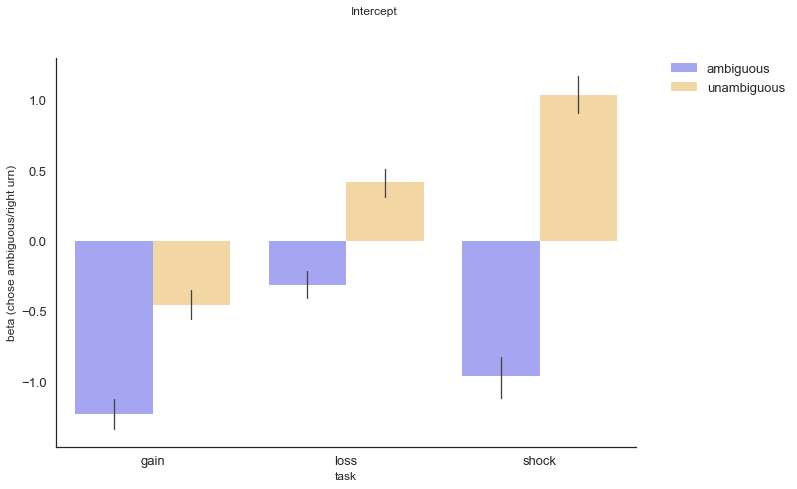

In [218]:
model_df = model_param_df.loc[model_param_df['parameter'] == 'intercept']
fig = plot_bargraph_single_param(model_df,stripplot=False,outlier_cutoff=None, suptitle='Intercept', ylabel='beta (chose ambiguous/right urn)', xlabel='task', order=['ambiguous', 'unambiguous'], colors = ['blue', 'orange'], widtherr = 1.3)


In [263]:
#df.gain_or_loss_trial.astype('category')
y,X = dmatrices('beta ~ task + condition + task*condition', data = model_df, return_type='dataframe')
model = sm.MixedLM(y,X,model_df['MID']).fit()
#model.summary()

In [ ]:
#### Loss as reference

In [57]:
#relevel with loss as reference
X['task[T.gain]'] = 0
X.loc[(X['task[T.shock]'] == 0) & (X['task[T.loss]'] == 0), 'task[T.gain]'] = 1.0
X = X.drop('task[T.loss]', axis=1)
X = X.drop('task[T.loss]:condition[T.unambiguous]', axis = 1)

X['task[T.gain]:condition[T.unambiguous]'] = 0
X.loc[(X['task[T.gain]'] == 1) & (X['condition[T.unambiguous]'] == 1), 'task[T.gain]:condition[T.unambiguous]'] = 1.0


In [220]:
# model = sm.MixedLM(y,X,model_df['MID']).fit()
# model.summary()

In [ ]:
#### shock as reference

In [59]:
#relevel with shock as reference
X['task[T.loss]'] = 0
X.loc[(X['task[T.shock]'] == 0) & (X['task[T.gain]'] == 0), 'task[T.loss]'] = 1.0
X = X.drop('task[T.shock]', axis=1)
X = X.drop('task[T.shock]:condition[T.unambiguous]', axis = 1)

X['task[T.loss]:condition[T.unambiguous]'] = 0
X.loc[(X['task[T.loss]'] == 1) & (X['condition[T.unambiguous]'] == 1), 'task[T.loss]:condition[T.unambiguous]'] = 1.0


In [221]:
# model = sm.MixedLM(y,X,model_df['MID']).fit()
# model.summary()

### Magnitude

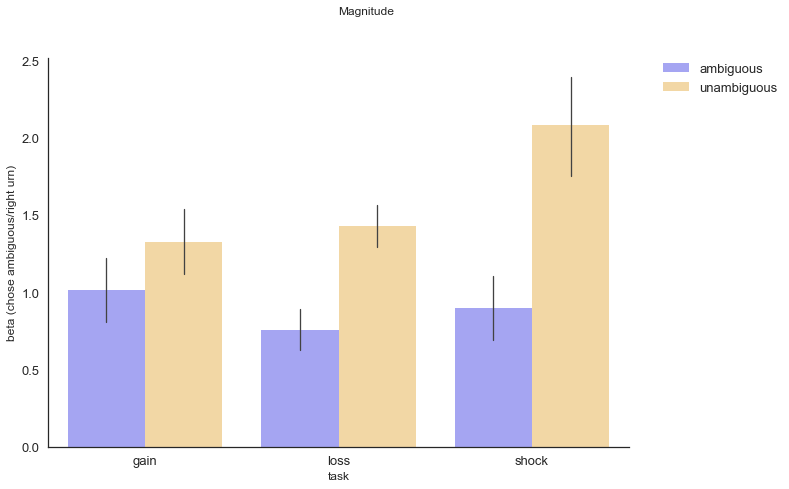

In [223]:
model_df = model_param_df
model_df = model_param_df.loc[model_param_df['parameter'] == 'mag_diff']
fig = plot_bargraph_single_param(model_df,stripplot=False,outlier_cutoff=None, suptitle='Magnitude', ylabel='beta (chose ambiguous/right urn)', xlabel='task', order=['ambiguous', 'unambiguous'], colors = ['blue', 'orange'], widtherr = 1.3)


In [ ]:
#### Gain as reference

In [262]:
#df.gain_or_loss_trial.astype('category')
y,X = dmatrices('beta ~ task + condition + task*condition ', data = model_df, return_type='dataframe')
model = sm.MixedLM(y,X,model_df['MID']).fit()
#model.summary()

In [232]:
#X.head(10)

In [ ]:
#### Loss as reference

In [233]:
#relevel with loss as reference
X['task[T.gain]'] = 0
X.loc[(X['task[T.shock]'] == 0) & (X['task[T.loss]'] == 0), 'task[T.gain]'] = 1.0
X = X.drop('task[T.loss]', axis=1)
X = X.drop('task[T.loss]:condition[T.unambiguous]', axis = 1)

X['task[T.gain]:condition[T.unambiguous]'] = 0
X.loc[(X['task[T.gain]'] == 1) & (X['condition[T.unambiguous]'] == 1), 'task[T.gain]:condition[T.unambiguous]'] = 1.0


In [261]:

model = sm.MixedLM(y,X,model_df['MID']).fit()
#model.summary()

In [ ]:
#### Shock as Reference

In [235]:
#relevel with shock as reference
X['task[T.loss]'] = 0
X.loc[(X['task[T.shock]'] == 0) & (X['task[T.gain]'] == 0), 'task[T.loss]'] = 1.0
X = X.drop('task[T.shock]', axis=1)
X = X.drop('task[T.shock]:condition[T.unambiguous]', axis = 1)

X['task[T.loss]:condition[T.unambiguous]'] = 0
X.loc[(X['task[T.loss]'] == 1) & (X['condition[T.unambiguous]'] == 1), 'task[T.loss]:condition[T.unambiguous]'] = 1.0


In [260]:
model = sm.MixedLM(y,X,model_df['MID']).fit()
#model.summary()

### Probability

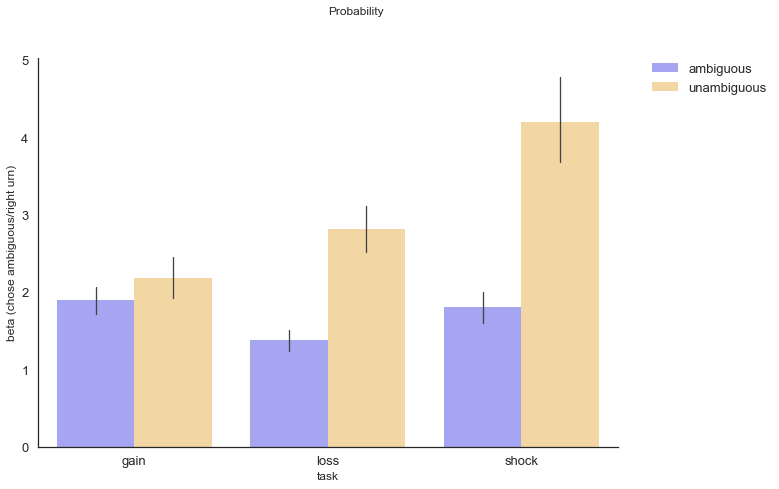

In [237]:
model_df = model_param_df
model_df = model_param_df.loc[model_param_df['parameter'] == 'prob_diff']
fig = plot_bargraph_single_param(model_df,stripplot=False,outlier_cutoff=None, suptitle='Probability', ylabel='beta (chose ambiguous/right urn)', xlabel='task', order=['ambiguous', 'unambiguous'], colors = ['blue', 'orange'], widtherr = 1.3)


In [272]:
#### Gain as Reference

In [259]:
y,X = dmatrices('beta ~ task + condition + task*condition', data = model_df, return_type='dataframe')
model = sm.MixedLM(y,X,model_df['MID']).fit()
#model.summary()

In [ ]:
#### Loss as Reference

In [239]:
#relevel with loss as reference
X['task[T.gain]'] = 0
X.loc[(X['task[T.shock]'] == 0) & (X['task[T.loss]'] == 0), 'task[T.gain]'] = 1.0
X = X.drop('task[T.loss]', axis=1)
X = X.drop('task[T.loss]:condition[T.unambiguous]', axis = 1)

X['task[T.gain]:condition[T.unambiguous]'] = 0
X.loc[(X['task[T.gain]'] == 1) & (X['condition[T.unambiguous]'] == 1), 'task[T.gain]:condition[T.unambiguous]'] = 1.0

In [258]:
model = sm.MixedLM(y,X,model_df['MID']).fit()
#model.summary()

In [ ]:
#### Shock as Reference

In [241]:
#relevel with shock as reference
X['task[T.loss]'] = 0
X.loc[(X['task[T.shock]'] == 0) & (X['task[T.gain]'] == 0), 'task[T.loss]'] = 1.0
X = X.drop('task[T.shock]', axis=1)
X = X.drop('task[T.shock]:condition[T.unambiguous]', axis = 1)

X['task[T.loss]:condition[T.unambiguous]'] = 0
X.loc[(X['task[T.loss]'] == 1) & (X['condition[T.unambiguous]'] == 1), 'task[T.loss]:condition[T.unambiguous]'] = 1.0


In [257]:
model = sm.MixedLM(y,X,model_df['MID']).fit()
#model.summary()

In [273]:
# %%bash 
# #jupyter nbconvert --to slides Clinical_DM_Learning_Rate_Difference_Anx_Dep.ipynb && mv Clinical_DM_Learning_Rate_Difference_Anx_Dep.slides.html Clinical_DM_Learning_Rate_Difference_Anx_Dep_v1.slides.html
# #jupyter nbconvert --to html Example_analyze_emmas_fmri_shock_data.ipynb && mv Example_analyze_emmas_fmri_shock_data.html ../html_reports/Example_analyze_emmas_fmri_shock_data_v1.html
# jupyter nbconvert --to pdf --template pdf_template_nocode.tplx  Basic_Analyses_modelEmma.ipynb
# cp Basic_Analyses_modelEmma.pdf ../reports/Basic_Analyses_modelEmma_12_29_17.pdf
# cp Basic_Analyses_modelEmma.ipynb ../reports/Basic_Analyses_modelEmma_12_29_17.ipynb

In [255]:
os.chdir('/Users/chris/Desktop/ambi_gain_loss_shock/notebooks')